#1.Montar Google Drive en Google colaboratory 

In [13]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#2.Importando librerías necesarias.

In [ ]:
import cv2                                  #libreria de opencv
import numpy as np                          #libreria para manejo de arrays 
from matplotlib import pyplot as plt        #libreria para visualizar graficos y otros
from google.colab.patches import cv2_imshow #modulo para visualizar imagenes en google colaboratory

#3.Cargando y visualizando imagenes

Image Dimensiones  :  (225, 225, 3)
Alto:  225 ,Ancho:  225 Número de canales: 3


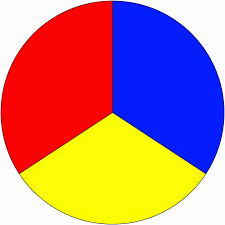

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Deep learning/Imagenes/images.png")
if img.size == 0:
  print("Error: la imagen no fue cargada con exito.")
else:
  print('Image Dimensiones  : ',img.shape)
  print("Alto: ",str(img.shape[0]),",Ancho: ",img.shape[1],"Número de canales:",img.shape[2])
  cv2_imshow(img)

#4.Aplicando filtros

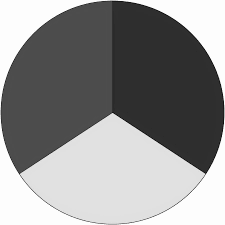

In [ ]:
#convirtiendo la imagen a escala de grises
processed_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#guardando la imagen en drive
#cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_gray.png', processed_image)
cv2_imshow(processed_image)

##channels colors

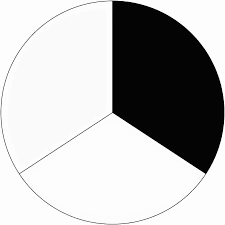

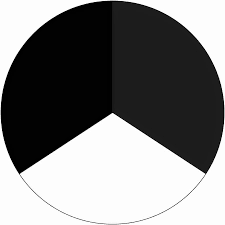

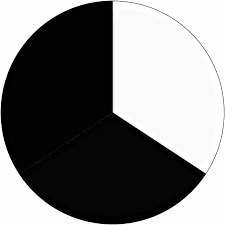

In [ ]:
#extrayendo el canal rojo (RED channel)
red_channel = img[:,:,2]
#extrayendo el canal verde (Green channel)
green_channel = img[:,:,1]
#extrayendo el canal azul (blue channel)
blue_channel = img[:,:,0]
#cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_red.png', red_channel)
#cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_green.png', green_channel)
#cv2.imwrite('/content/drive/My Drive/IA/Computer_Vision/Images/image1_processed_blue.png', blue_channel)
cv2_imshow(red_channel)
cv2_imshow(green_channel)
cv2_imshow(blue_channel)


##Resaltado de un color (ejemplo el rojo)

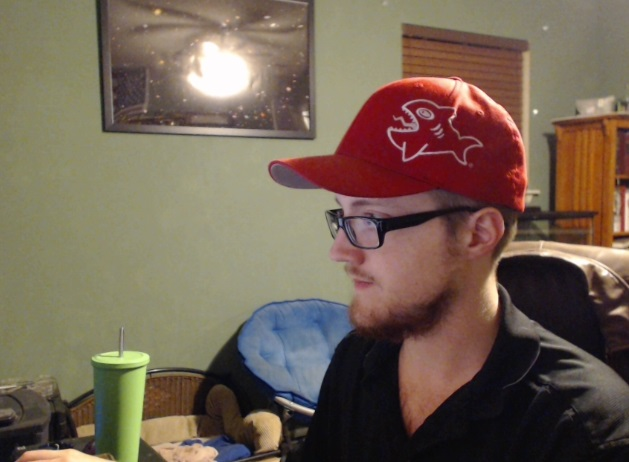

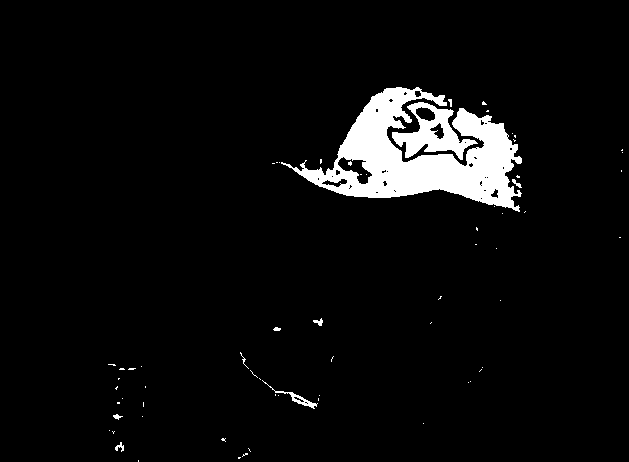

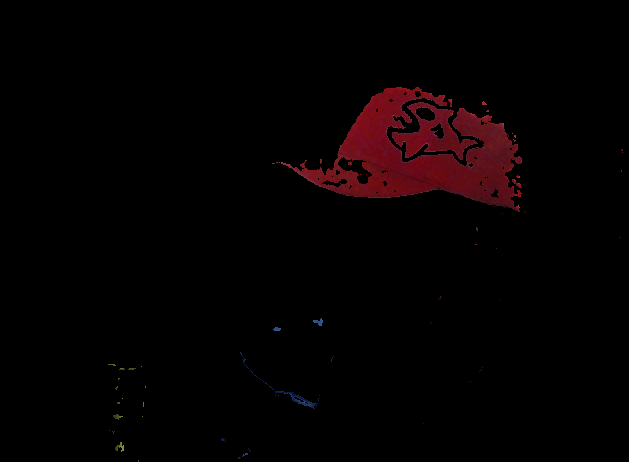

In [ ]:
#Cargamos la imagen de la que queremos reslartar el rojo
img = cv2.imread("/content/drive/MyDrive/Deep learning/Imagenes/imagen2.jpg")
#convertimos la imagen a gris
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_red = np.array([30,150,50]) # codigo minimo del rojo en del B,G,R
upper_red = np.array([255,255,180]) # codigo maximo del rojo en B,G,R
#Creamos una mascara de la imagen donde resaltaremos el color rojo
mask_red = cv2.inRange(hsv, lower_red, upper_red) 
#aplicamos la mascara en la imagen
img_result = cv2.bitwise_and(img,img, mask = mask_red)
#visualizamos la imagen
cv2_imshow(img)
cv2_imshow(mask_red)
cv2_imshow(img_result)

##Gradiente de Imágenes

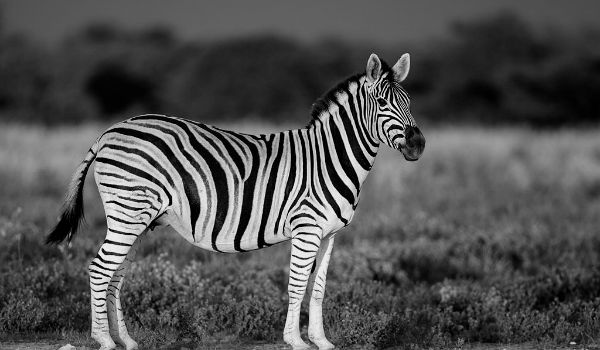

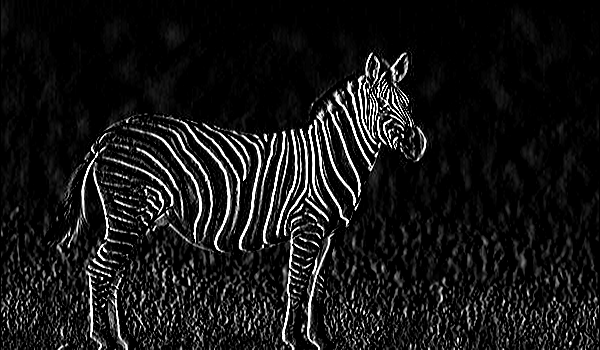

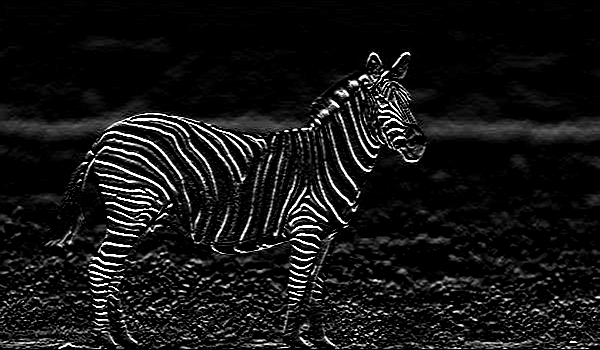

In [ ]:
# cargamos la imagen y la pasamos de una a gris
img = cv2.imread("/content/drive/MyDrive/Deep learning/Imagenes/cebra.jpg",0)
#cambiar CV_64F  por CV_8U, si quiere verlo en negro/blanco
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
cv2_imshow(img)
cv2_imshow(sobelx)
cv2_imshow(sobely)

##Gradiente mejorado

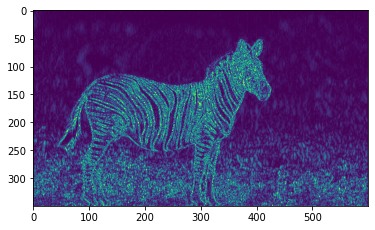

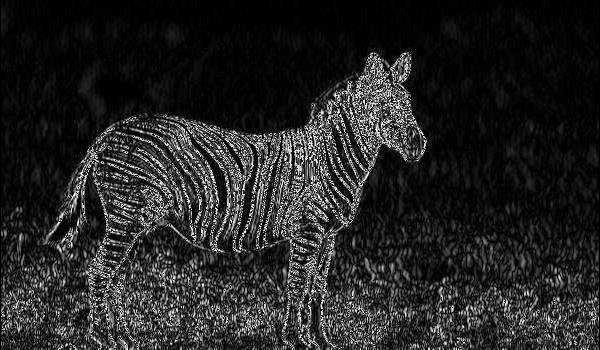

In [ ]:
sobelx8u=cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
#Utilizando cv2.CV_64F. Luego toma el valor absoluto y hace la conversión a cv2.CV_8U
sobelx64f=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
abs_sobel64f=np.absolute(sobelx64f)
sobel_8u=np.uint8(abs_sobel64f)
plt.imshow(sobel_8u)
plt.show()
cv2_imshow(sobel_8u)

##Detector de bordes Canny, cv2.Canny ()


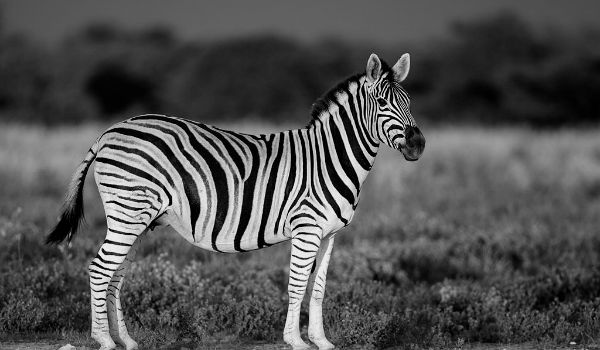

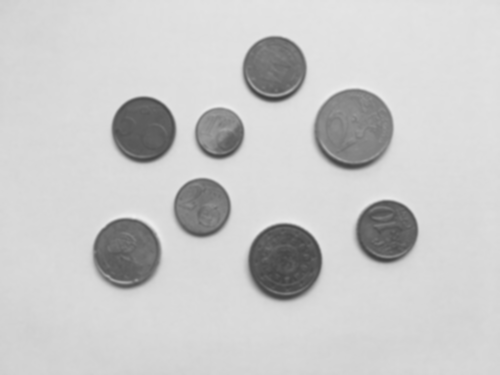

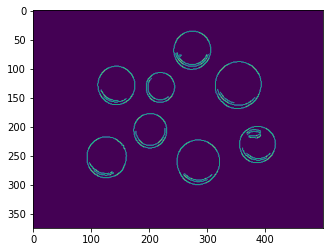

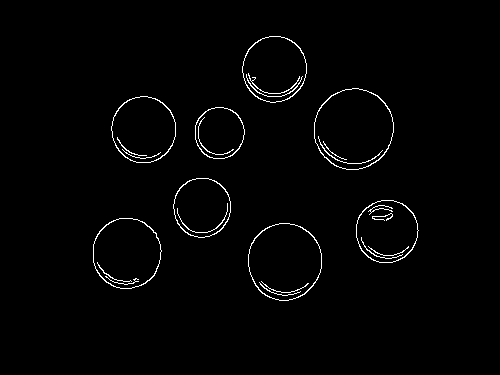

In [ ]:
img_gris = cv2.imread("/content/drive/MyDrive/Deep learning/Imagenes/coins.jpg",0)
cv2_imshow(img)
#Aplicamos un filtro gausiano para suavizar la imagen
img_gauss = cv2.GaussianBlur(img_gris, (5,5), 0)
cv2_imshow(img_gauss)
img_canny = cv2.Canny(img_gauss, 50, 150)
plt.imshow(img_canny)
plt.show()
cv2_imshow(img_canny)

In [ ]:
contornos,_=cv2.findContours(img_canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("He encontrado {} objetos".format(len(contornos)))


He encontrado 8 objetos


[[ 731  251  209  209]
 [ 935  238  235  235]
 [ 478  290  211  211]
 [1142  275  187  187]
 [ 228  333  224  224]]


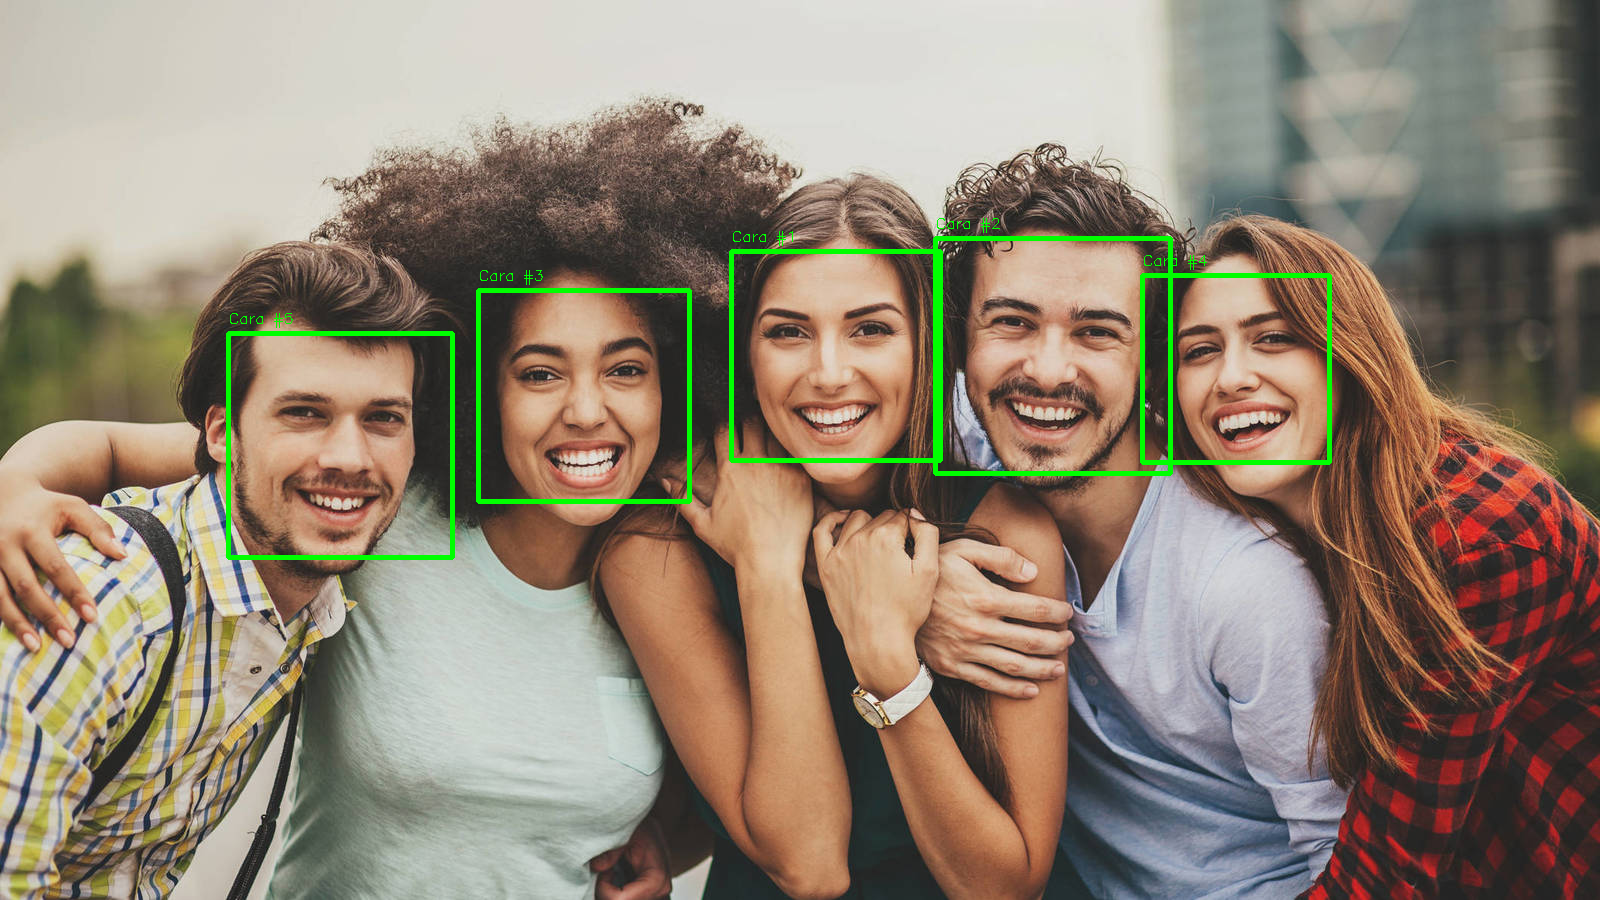

False

In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Deep learning/Hardcascade/haarcascade_frontalface_default.xml');
img = cv2.imread("/content/drive/MyDrive/Deep learning/Imagenes/Portada-4ªO.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(img,scaleFactor=1.1,  minNeighbors=60)
print(faces)
idx=0
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
  idx += 1
  cv2.putText(img,"Cara #{}".format(idx),(x,y-10),
  cv2.FONT_HERSHEY_SIMPLEX,.5,(0,255,0),1)
cv2_imshow(img)
cv2.imwrite('/content/drive/MyDrive/IA/Computer_Vision/Images/dc_comics_detectada.jpg',img)

[[230  32 112 224]
 [ 40  37 112 224]
 [424  44 112 224]
 [608  44 112 224]]


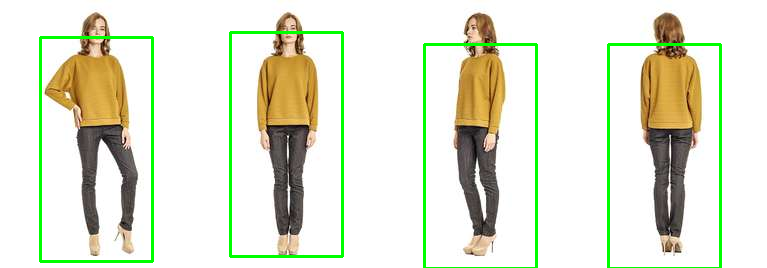

False

In [29]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

fullbody_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Deep learning/Hardcascade/haarcascade_fullbody.xml');
img = cv2.imread("/content/drive/MyDrive/Deep learning/Imagenes/SC2QX4PJYB4MX22DAQL5J7UZFM.jpg")
fullbody = fullbody_cascade.detectMultiScale(img,scaleFactor=2, minNeighbors=1)
print(fullbody)
idx=0
for (sx,sy,sw,sh) in fullbody:
  cv2.rectangle(img,(sx,sy),((sx+sw),(sy+sh)),(0,255,0),2)
  
cv2_imshow(img)
cv2.imwrite('/content/drive/MyDrive/IA/Images/cuepoc_detacadas.jpg',img)